<a href="https://colab.research.google.com/github/bumcoding/PyTorch_Study/blob/main/01_PyTorchFundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 개인 로컬 환경일 경우 pip(or conda) install을 해야 사용 가능함

import numpy as np
import torch

#텐서 버전 확인

torch.__version__

'2.6.0+cu124'

# 0. Tensor란?

Tensor란, Numpy의 배열과 유사한 자료형으로 다차원의 행렬이다.

사용하는 방법도 Numpy와 유사하다.


*   scalar (0차원 텐서) : 우리가 흔히 알고 있는 상수, 하나의 값을 표현한다.
*   vector (1차원 텐서) : 여러개의 값을 가진 1차원 데이터
*   matrix (2차원 텐서) : 행렬, 행과 열로 이루어진 2차원의 데이터
*   tensor : n차원의 행렬 형태로 표현

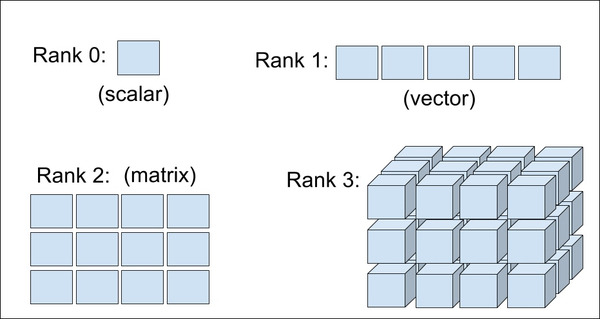

ex) 가로, 세로 사이즈가 100인 컬러 사진 이미지 1장은 [3, 100, 100]의 3차원 텐서로 저장된다.

또한, 이러한 사진이 5장 있다면 [5, 3, 100, 100]의 4차원 텐서로 저장된다.

# 1. Tensor 만들기

## torch.tensor()

In [3]:
# torch.tensor() : 가장 기본적으로 tensor를 만들 수 있는 방법

x = torch.tensor(5)

print(x)

tensor(5)


In [4]:
a = torch.tensor([1, 2, 3, 4, 5])
print(a)
print(a.shape) # 텐서의 형태 확인

b = torch.tensor([[1, 2, 3, 4, 5]])
print(b)
print(b.shape)

c = torch.tensor([[1], [2], [3], [4], [5]])
print(c)
print(c.shape)

d = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(d)
print(d.shape)

tensor([1, 2, 3, 4, 5])
torch.Size([5])
tensor([[1, 2, 3, 4, 5]])
torch.Size([1, 5])
tensor([[1],
        [2],
        [3],
        [4],
        [5]])
torch.Size([5, 1])
tensor([[1, 2, 3],
        [4, 5, 6]])
torch.Size([2, 3])


In [5]:
# list나 set, numpy, array 등에도 적용 가능
# list는 파이썬의 구조 형태로 원소 타입이 서로 달라도 되지만, 연산에 반복문이 필요해서 메모리, 브로드캐스팅에 비효율적
# numpy는 모든 원소 타입을 같게 맞춰주기만 하면 연산이 빠르고 고차원 배열의 연산이 가능함
# tensor는 numpy와 형태는 비슷하지만 딥러닝에 최적화되어 GPU 연산이 가능함

temp_list = [1, 2, 3, 4, 5]
torch.tensor(temp_list)

tensor([1, 2, 3, 4, 5])

In [6]:
temp_set = (1, 2, 3, 4, 5) # set은 인덱스 안의 순서가 없으며 중복된 값이 있을 경우 제거함
torch.tensor(temp_set)

tensor([1, 2, 3, 4, 5])

In [7]:
temp_np_array = np.array(temp_list) # np.array() 는 list를 numpy 배열로 변환함
torch.tensor(temp_np_array)

tensor([1, 2, 3, 4, 5])

In [8]:
torch.from_numpy(temp_np_array) # torch.from_numpy를 통해 numpy를 tensor로 변환함

tensor([1, 2, 3, 4, 5])

## torch.ones()

In [9]:
# torch.ones()를 통해 만들면 각 element가 1인 tensor를 만들어줌
# argment로는 tensor의 dimension을 입력

torch.ones(3)

tensor([1., 1., 1.])

In [10]:
# tensor의 데이터 타입도 변경 가능

torch.ones([3, 2, 4], dtype=int)

tensor([[[1, 1, 1, 1],
         [1, 1, 1, 1]],

        [[1, 1, 1, 1],
         [1, 1, 1, 1]],

        [[1, 1, 1, 1],
         [1, 1, 1, 1]]])

## torch.zeros()

In [11]:
# torch.ones()를 통해 만들면 각 element가 0인 tensor를 만들어줌
# argment로는 tensor의 dimension을 입력

torch.zeros(2, 3, 4, dtype=int)

tensor([[[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]]])

## torch.arange()

In [12]:
# torch.arange()를 통해 주어진 범위 내의 정수를 순서대로 생성

torch.arange(1, 10) # 시작과 끝 범위 설정

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
torch.arange(10, 3, -1) # 시작, 끝, 단위

tensor([10,  9,  8,  7,  6,  5,  4])

## torch.rand()

In [14]:
# [0, 1]의 uniform dist에서 난수를 생성해서 tensor로 만들어줌
# .rand()는 0~1 사이의 균등한 분포로 값을 생성
# .randn()은 평균 0, 표준편차 1인 정규분포의 값을 생성
# .empty()는 값이 초기화되지 않은 쓰레기 값을 생성

torch.rand(5) # 0~1 사이 값

tensor([0.1160, 0.4287, 0.7624, 0.9414, 0.1701])

In [15]:
torch.rand(5, 5, dtype=float) # tensor의 차원 수도 조절 가능

tensor([[0.5404, 0.8848, 0.8581, 0.9553, 0.0398],
        [0.9793, 0.7567, 0.1218, 0.2808, 0.4230],
        [0.0715, 0.4730, 0.1566, 0.4407, 0.3626],
        [0.2122, 0.7302, 0.9086, 0.0933, 0.5423],
        [0.9934, 0.1091, 0.1671, 0.2034, 0.1099]], dtype=torch.float64)

## torch.~~_like()

In [16]:
# torch.ones_like()를 통해 기존의 텐서와 같은 모양의 원소가 1인 텐서를 만들어줌

a = torch.zeros(3, 4, 5)

torch.ones_like(a) # 값이 다르지만 tensor의 형태는 그대로 보존함

tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])

In [17]:
a = torch.rand(3, 4) # rand의 텐서 형태는 3, 4의 matrix

torch.zeros_like(a) # a의 값이 0으로 변환 되었지만 형태는 matrix 그대로

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

# 2. Attribute : shape, dtype, device

해당 텐서의 모양, 데이터 타입, 연결된 device(하드웨어)를 확인

## tensor.shape

In [18]:
a = torch.tensor([[1, 2, 3], [4, 5, 6]])

print(a)
print(a.shape) # 데이터의 형태 확인

tensor([[1, 2, 3],
        [4, 5, 6]])
torch.Size([2, 3])


## tensor.dtype

* 32bit float = float
* 64bit float = double
* 18bit float = half
* 32bit int = int
* 64bit int = torch.long
* 16bit int = short

* 32bit x 2 = complex64 (복소수)
* 64bit x 2 = complex128 (복소수)
* 8bit = bool (참/거짓)
* 8bit = unit8 (0~255사이의 부호 없는 정수)


In [19]:
# tensor 안에 서로 다른 데이터 타입은 사용 불가

b = torch.zeros(2, 3, dtype=torch.int) # 기존 데이터 타입의 변환 가능

print(b)
print(b.dtype) # 데이터 타입을 확인

tensor([[0, 0, 0],
        [0, 0, 0]], dtype=torch.int32)
torch.int32


In [20]:
# python의 자료형

float_tensor = torch.ones([3, 5, 5], dtype=torch.float)
double_tensor = torch.ones(1, dtype=torch.double)

complex_float_tensor = torch.ones(1, dtype=torch.complex64)
comlpex_double_tensor = torch.ones(1, dtype=torch.complex128)

int_tensor = torch.ones(1, dtype=torch.int)
long_tensor = torch.ones(1, dtype=torch.long)
short_tensor = torch.ones(1, dtype=torch.short)

unit_tensor = torch.ones(1, dtype=torch.uint8)
bool_tensor = torch.ones(1, dtype=torch.bool)

float_tensor, double_tensor, complex_float_tensor, comlpex_double_tensor, int_tensor, long_tensor, short_tensor, unit_tensor, bool_tensor

(tensor([[[1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.]],
 
         [[1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.]],
 
         [[1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.]]]),
 tensor([1.], dtype=torch.float64),
 tensor([1.+0.j]),
 tensor([1.+0.j], dtype=torch.complex128),
 tensor([1], dtype=torch.int32),
 tensor([1]),
 tensor([1], dtype=torch.int16),
 tensor([1], dtype=torch.uint8),
 tensor([True]))

## tensor.device

In [21]:
# 현재 해당 tensor가 어느 device에 있는지 확인하는 방법

a = torch.tensor([1, 2, 3, 4, 5])
a.device # 현재 사용하고 있는 하드웨어의 종류

device(type='cpu')

In [22]:
# 지금 GPU 사용이 가능한 환경인지를 확인

torch.cuda.is_available()

True

In [23]:
# GPU 이름 체크 (cuda:0에 연결된 그래픽 카드 기준)

torch.cuda.get_device_name(device = 0)

'Tesla T4'

In [25]:
# 사용 가능한 GPU 개수 체크

torch.cuda.device_count() # 코랩 환경은 세션 당 GPU를 하나씩 제공함

1

In [26]:
# tensor를 GPU에 할당
# .cuda()를 추가하면 GPU에 올라감
#.to("cuda")를 추가하면 GPU가 사용 가능하면 사용함

a = torch.tensor([1, 2]).cuda()
b = torch.tensor([1, 2]).to("cuda")

In [27]:
a.device

device(type='cuda', index=0)

In [30]:
print(b.device)

print(b.to("cuda"))

cpu
tensor([[0, 0, 0],
        [0, 0, 0]], device='cuda:0', dtype=torch.int32)


# 3. Tensor Aggregation

* element-wise 연산
* min 연산
* max 연산
* mean 연산



## element-wise 연산

tensor의 같은 자리 원소들끼리 산술 연산

In [40]:
a = torch.tensor([[1, 2], [3, 4]])
b = torch.tensor([[5, 6], [7, 8]])

print(a)
print(b)

print(f"덧셈 {a + b}")
print(f"뺄셈 {a + b}")
print(f"곱셈 {a + b}")
print(f"나눗셈 {a + b}")

tensor([[1, 2],
        [3, 4]])
tensor([[5, 6],
        [7, 8]])
덧셈 tensor([[ 6,  8],
        [10, 12]])
뺄셈 tensor([[ 6,  8],
        [10, 12]])
곱셈 tensor([[ 6,  8],
        [10, 12]])
나눗셈 tensor([[ 6,  8],
        [10, 12]])


In [43]:
print(a.add(b)) # add : 더하기
print(a.sub(b)) # sub : 빼기
print(a.mul(b)) # mul : 곱하기
print(a.div(b)) # div : 나누기

tensor([[ 6,  8],
        [10, 12]])
tensor([[-4, -4],
        [-4, -4]])
tensor([[ 5, 12],
        [21, 32]])
tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])


## inplace 연산

함수 뒤에 _를 붙이면 자기 자신의 값을 바꾸게 된다.

연산 결과를 반환하면서 동시에 자기 자신의 데이터를 고침

In [45]:
print(a.add(b))
print(a)

print(a.add_(b)) # 함수 뒤에 _를 붙여 a의 값을 함수값으로 바꿈
print(a)

tensor([[ 6,  8],
        [10, 12]])
tensor([[1, 2],
        [3, 4]])
tensor([[ 6,  8],
        [10, 12]])
tensor([[ 6,  8],
        [10, 12]])


## tensor.min()

가장 작은 값을 반환해줌

argument로 차원을 넣어주면 해당 차원에서 각각 가장 작은 값들과, 그 값들의 위치를 함께 리턴

In [50]:
a = torch.tensor([[9, 4, 7], [8, 5, 6]])

print(a.shape)
print(a.min()) # 가장 작은 tensor 값 출력

# values는 가장 작은 값들 비교 후 출력
# indices는 가장 작은 tensor 값의 rank 위치를 비교 후 출력
print(a.min(dim = 0))
print(a.min(dim = 1)) # dim은 n차원끼리의 비교

torch.Size([2, 3])
tensor(4)
torch.return_types.min(
values=tensor([8, 4, 6]),
indices=tensor([1, 0, 1]))
torch.return_types.min(
values=tensor([4, 5]),
indices=tensor([1, 1]))


## tensor.max()

가장 큰 값을 반환해줌

argument로 차원을 넣어주면 해당 차원에서 각각 가장 큰 값들과, 그 값들의 위치를 함께 리턴

In [51]:
a = torch.tensor([[1, 9, 5], [2, 6, 7]])

print(a.shape)
print(a.max()) # 가장 큰 tensor 값 출력

# values는 가장 큰 값들 비교 후 출력
# indices는 가장 큰 tensor 값의 rank 위치를 비교 후 출력
print(a.max(dim = 0))
print(a.max(dim = 1)) # dim은 n차원끼리의 비교

torch.Size([2, 3])
tensor(9)
torch.return_types.max(
values=tensor([2, 9, 7]),
indices=tensor([1, 0, 1]))
torch.return_types.max(
values=tensor([9, 7]),
indices=tensor([1, 2]))


## tensor.mean()

tensor 전체 평균 or 차원 별 평균값 리턴

In [56]:
a = torch.FloatTensor([[1, 2, 3], [4, 5, 6]])

print(a)
print(a.mean()) # 모든 값들의 평균 값을 출력

# 각 dimension에 해당하는 위치의 평균 값 출력
print(a.mean(dim = 0))
print(a.mean(dim = 1))

tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor(3.5000)
tensor([2.5000, 3.5000, 4.5000])
tensor([2., 5.])


# 4. Indexing

원하는 원소나 영역을 index를 이용해 선택

기존의 numpy, pandas의 indexing과 유사

In [57]:
a = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

a

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [58]:
a.shape

torch.Size([3, 3])

In [63]:
print(a[0])
print(a[1])
print(a[2])

print(a[0][2])

tensor([1, 2, 3])
tensor([4, 5, 6])
tensor([7, 8, 9])
tensor(3)


In [66]:
b = torch.rand(3, 4, 3)
b

tensor([[[0.1569, 0.5267, 0.4995],
         [0.8505, 0.8650, 0.3314],
         [0.7403, 0.6974, 0.4981],
         [0.3237, 0.9555, 0.2079]],

        [[0.0200, 0.6879, 0.0690],
         [0.8133, 0.3084, 0.3257],
         [0.6019, 0.8651, 0.8550],
         [0.3258, 0.6925, 0.3574]],

        [[0.5324, 0.5115, 0.9151],
         [0.4055, 0.2462, 0.6710],
         [0.7910, 0.0092, 0.0549],
         [0.7338, 0.0574, 0.4111]]])

In [82]:
# 주의 : 인덱스는 0부터 시작 rand값의 크기 설정은 1부터 시작

print(b[2][0])
print(b[2][3][2])

print(b[1:3]) # 인덱스 1부터 2,3번째 인덱스까지만 불러오기

tensor([0.5324, 0.5115, 0.9151])
tensor(0.4111)
tensor([[[0.0200, 0.6879, 0.0690],
         [0.8133, 0.3084, 0.3257],
         [0.6019, 0.8651, 0.8550],
         [0.3258, 0.6925, 0.3574]],

        [[0.5324, 0.5115, 0.9151],
         [0.4055, 0.2462, 0.6710],
         [0.7910, 0.0092, 0.0549],
         [0.7338, 0.0574, 0.4111]]])


# 5. Shaping Operation



* reshape
* squeeze / un squeeze
* stack
* cat

텐서의 shape, dimension을 조절하는 방법
여러개의 텐서를 합치는 방법



## tensor.reshape()

모양을 변경할 수 있음

원래 사이즈를 구성하는 각 차원 별 길이의 곱으로 표현 가능하다면 변경 가능

tensor.shape가 [x, y]라면, 총 input size인 x * y의 값으로 표현할 수 있는 차원의 조합이면 가능